# **Módulo 2. Análisis y Reporte sobre el Desempeño del Modelo**

**Carlos Enrique Lucio Domínguez | A00828524**

**Google Colab URL:** https://colab.research.google.com/drive/1FvWbxj0U5P6HwATIOriGmKBsTABOvJqk?usp=sharing

### **Especificaciones**

1. Escoge una de las 2 implementaciones que tengas y genera un análisis sobre su desempeño en un set de datos. Este análisis lo deberás documentar en un reporte con indicadores claros y gráficas comparativas que respalden tu análisis.

2. El análisis debe de contener los siguientes elementos:
  * Separación y evaluación del modelo con un conjunto de prueba y un conjunto de validación (Train/Test/Validation).
  * Diagnóstico y explicación el grado de bias o sesgo: bajo medio alto
  * Diagnóstico y explicación el grado de varianza: bajo medio alto
  * Diagnóstico y explicación el nivel de ajuste del modelo: underfitt fitt overfitt

3. Basándote en lo encontrado en tu análisis utiliza técnicas de regularización o ajuste de parámetros para mejorar el desempeño de tu modelo y documenta en tu reporte cómo mejoró este.

### **Dataset utilizado**

**Nombre:** House price prediction

**Kaggle URL:** https://www.kaggle.com/datasets/shree1992/housedata?select=data.csv

### **Librerías utilizadas**

In [312]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from google.colab import drive
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### **Análisis del modelo**

Primeramente, se realizó una lectura del archivo csv y se guardó en un dataframe de lal ibrería pandas.

In [294]:
drive.mount("/content/gdrive")
%cd "/content/gdrive/MyDrive/ColabNotebooks/ConcentraciónIA/Módulo Machine Learning"

df = pd.read_csv('data.csv') # Lectura del archivo de datos encontrado en el mismo folder que el archivo .py.
df.head(3)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/ColabNotebooks/ConcentraciónIA/Módulo Machine Learning


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


Posteriormente, se seleccionaron las variables independientes y dependientes. Para las variables independientes se seleccionaron todas aquellas que son variables continuas.

In [295]:
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']]
y = df['price']

La separación de datos se llevó a cabo utilizando la técnica de train/validate/test, donde buscamos crear 3 subconjuntos con el dataset. En este caso, la separación de datos consistió en un 60% para datos de entrenamiento, 20% para validación y 20% para pruebas.

In [296]:
# Separación de datos de entrenamiento (60%), validación (20%) y pruebas (20%).
X_train, X_rem, y_train, y_rem = train_test_split(X, y, random_state=5, train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, random_state=5, test_size=0.5)

Se entrenó un modelo de regresión lineal de la librería scikit-learn, el cual utiliza la técnica de Gradiente Descendiente, lo que permite modificar el hiperparámetro de *learning rate* representado por la variable *eta0*. Así mismo, el número de iteraciones máximas utilizado fue 5000.

In [297]:
lr_gd = SGDRegressor(eta0=0.00000000001, max_iter=5000, shuffle=False) # Modelo de Gradiente Descendiente donde eta0 es el learning rate.
lr_gd.fit(X_train, y_train) # Entrenamiento del modelo

SGDRegressor(eta0=1e-11, max_iter=5000, shuffle=False)

Ahora, lo esencial es aplicar un diagnóstico a nuestro modelo para conocer si presenta underfitting, overfitting o está balanceadamente ajustado. Para ello, en primera instancia debemos conocer el grado de bias y varianza del modelo.

A continuación se muestra el código utilizado para analizar el grado de bias del modelo utilizando la muestra de datos con la que fue entrenado.

In [298]:
y_train_pred = lr_gd.predict(X_train)

print("Error del modelo (Error Cuadrático Medio):", metrics.mean_squared_error(y_train, y_train_pred))
print("Métrica de desempeño del modelo (Coeficiente de determinación R^2):", lr_gd.score(X_train, y_train))

Error del modelo (Error Cuadrático Medio): 78056832838.1496
Métrica de desempeño del modelo (Coeficiente de determinación R^2): 0.45958846265621367


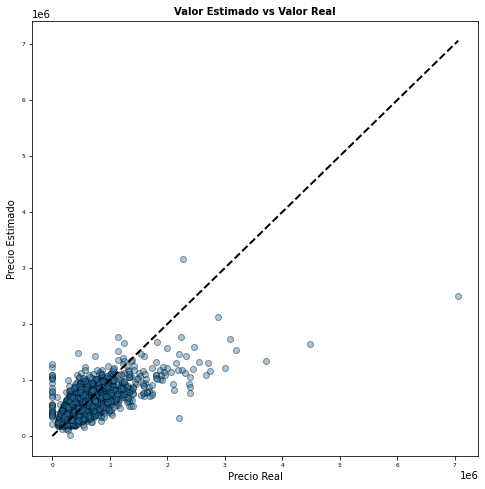

In [299]:
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], 'k--', color = 'black', lw=2)
plt.title('Valor Estimado vs Valor Real', fontsize = 10, fontweight = "bold")
plt.xlabel('Precio Real')
plt.ylabel('Precio Estimado')
plt.tick_params(labelsize = 6)

**Explicación del grado de bias/sesgo:** Como se pudo observar, el error cuadrático medio es relativamente bajo, si tomamos en cuenta que es un modelo de regresión lineal. Esto también se ve reflejado en el coeficiente de determinación, el cual es aceptable. Así mismo, en la gráfica podemos observar que los valores estimados no están tan lejanos de los valores reales. Debido a lo anterior, podemos concluir que el bias/sesgo del modelo, es decir, la lejanía entre las predicciones y valores reales del modelo, es **medio** con una ligera cercanía a ser bajo.

Siguiendo con el análisis de la varianza del modelo, a continuación se muestra el código utilizado para su correspondiente análisis.

In [300]:
y_valid_pred = lr_gd.predict(X_valid)
y_test_pred = lr_gd.predict(X_test)

# Comparación del error del modelo cuando se realizan predicciones sobre distintas muestras de datos.
print("Error del modelo para los datos de entrenamiento (Mean Squared Error):", metrics.mean_squared_error(y_train, y_train_pred))
print("Error del modelo para los datos de validación (Mean Squared Error):", metrics.mean_squared_error(y_valid, y_valid_pred))
print("Error del modelo para los datos de prueba (Mean Squared Error):", metrics.mean_squared_error(y_test, y_test_pred))
print()

# Comparación del coeficiente de determinación del modelo cuando se realizan predicciones sobre distintas muestras de datos.
print("Coeficiente de determinación R^2 para los datos de entrenamiento:", lr_gd.score(X_train, y_train))
print("Coeficiente de determinación R^2 para los datos de validación:", lr_gd.score(X_valid, y_valid))
print("Coeficiente de determinación R^2 para los datos de prueba:", lr_gd.score(X_test, y_test))

Error del modelo para los datos de entrenamiento (Mean Squared Error): 78056832838.1496
Error del modelo para los datos de validación (Mean Squared Error): 834396527211.1157
Error del modelo para los datos de prueba (Mean Squared Error): 225796051173.7079

Coeficiente de determinación R^2 para los datos de entrenamiento: 0.45958846265621367
Coeficiente de determinación R^2 para los datos de validación: 0.06912086402202
Coeficiente de determinación R^2 para los datos de prueba: 0.12361911048189334


Text(0.5, 1.0, 'Coeficiente R^2 del Modelo sobre Distintas Muestras')

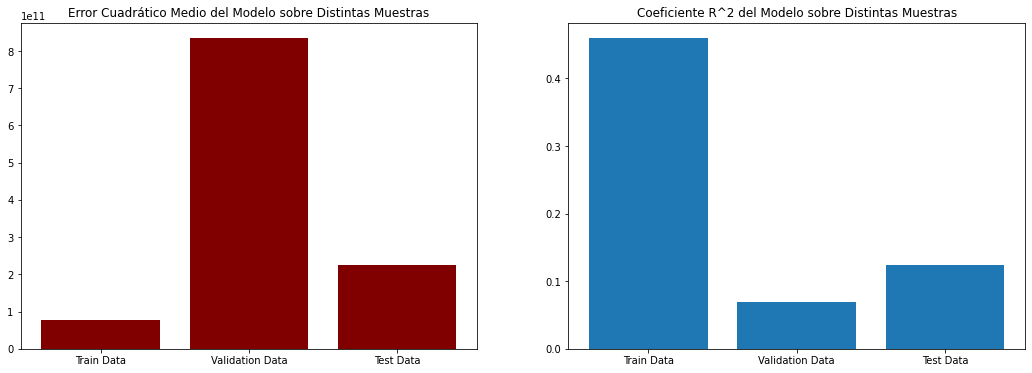

In [301]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].bar(['Train Data', 'Validation Data', 'Test Data'], [metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_valid, y_valid_pred), metrics.mean_squared_error(y_test, y_test_pred)], color ='maroon')
axes[0].set_title('Error Cuadrático Medio del Modelo sobre Distintas Muestras')

axes[1].bar(['Train Data', 'Validation Data', 'Test Data'], [lr_gd.score(X_train, y_train), lr_gd.score(X_valid, y_valid), lr_gd.score(X_test, y_test)])
axes[1].set_title('Coeficiente R^2 del Modelo sobre Distintas Muestras')

**Explicación del grado de varianza:** Como fue posible observar, el modelo se ajusta de manera muy distinta cuando es aplicado a diferentes muestras de datos y parece ser que sólo se ajustó bien a los datos de entrenamiento ya que el error obtenido sobre ese subset es bastante inferior al obtenido con los subset de validación y prueba. Así mismo, con el coeficiente de determinación podemos observar que el modelo esta mayormente ajustado al subset de entrenamiento. Con ello, podemos concluir que el modelo tiene una grado **alto** de varianza, ya que los resultados, el nivel de ajuste y los errores son muy diferentes al cambiar los datos.

**Conclusión del análisis:** Después de las acciones previamente realizadas para analizar el modelo podemos concluir con lo siguiente:
* El modelo tiene un grado de **bias/sesgo medio**, cercano a bajo.
* El modelo muestra un grado de **varianza alto**.
* El modelo presenta **overfitting**, es decir, tiene un sobreajuste a los datos de entrenamiento ya que cuando cambiamos la muestra de datos el modelo no tiene un buen desempeño.

### **Mejoramiento del modelo**

Previamente concluímos que el modelo presenta **overfitting**, lo cuál se debe a la complejidad del mismo. Por lo que, para mejorar su desempeño, debemos reducir su complejidad, aumentar la cantidad de datos de entrenamiento y buscaremos hacer algún cambio en el hiperparámetro de *learning rate* que ayude a mejorar el modelo.

Sin embargo, antes de seguir estos pasos consideraría importante evaluar el ajuste del modelo a los subsets de train/validation/test cuando cambiamos la semilla de aleatoriedad en la separación. Esto para verificar que la mayoría de las veces el modelo tiene el mismo comportamiento (ajustarse bien a los datos de entrenamiento pero no a los de validación y prueba), porque de lo contrario, podría significar que hay registros atípicos en el dataframe que están afectando el modelo y aquel/aquellos subsets con la mayor concentración de registros atípicos son los que terminan teniendo un mal ajuste en las predicciones.

**Analizando el ajuste del modelo ante distintas semillas de aleatoriedad en la separación**

A continuación se muestra el código implementado para comparar el ajuste del modelo a 10 distintas separaciones de train/validation/test.

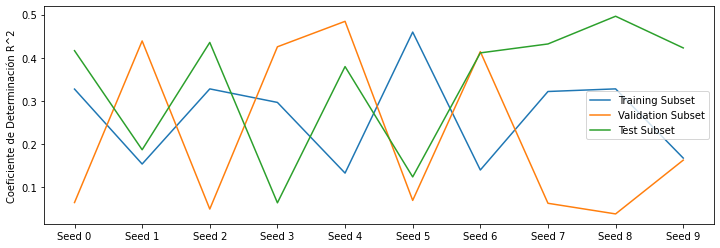

In [302]:
r2_s_train = []
r2_s_valid = []
r2_s_test = []

for seed in range(0,10):
  # Separación de datos de entrenamiento (60%), validación (20%) y pruebas (20%).
  X_s_train, X_s_rem, y_s_train, y_s_rem = train_test_split(X, y, random_state=seed, train_size=0.6)
  X_s_valid, X_s_test, y_s_valid, y_s_test = train_test_split(X_s_rem, y_s_rem, random_state=seed, test_size=0.5)

  lr_gd_s = SGDRegressor(eta0=0.00000000001, max_iter=5000, shuffle=False) # Modelo de Gradiente Descendiente donde eta0 es el learning rate.
  lr_gd_s.fit(X_s_train, y_s_train) # Entrenamiento del modelo

  r2_s_train += [lr_gd_s.score(X_s_train, y_s_train)]
  r2_s_valid += [lr_gd_s.score(X_s_valid, y_s_valid)]
  r2_s_test += [lr_gd_s.score(X_s_test, y_s_test)]

# Gráfico de comparación
seed_cols = ['Seed 0', 'Seed 1', 'Seed 2', 'Seed 3', 'Seed 4', 'Seed 5', 'Seed 6', 'Seed 7', 'Seed 8', 'Seed 9']
plt.figure(figsize=(12, 4))
plt.plot(seed_cols, r2_s_train, label='Training Subset')
plt.plot(seed_cols, r2_s_valid, label='Validation Subset')
plt.plot(seed_cols, r2_s_test, label='Test Subset')
plt.ylabel('Coeficiente de Determinación R^2')
plt.legend()

En la gráfica podemos observar que cuando realizamos cambios de aleatoriedad en la separación train/validation/test el modelo se ajusta a los distintos subsets de datos de una manera muy variable, lo que parece indicar que debemos realizar una limpieza de registros atípicos, ya que están afectando el desempeño del modelo dependiendo de en que subset estén concentrados.

**Limpieza de registros atípicos**

En el siguiente código se puede apreciar la manera en que se llevó a cabo la limpieza de registros atípicos.

In [303]:
# Limpieza de datos atípicos

lr_gd_l = SGDRegressor(eta0=0.00000000001, max_iter=5000, shuffle=False) # Modelo de Gradiente Descendiente donde eta0 es el learning rate.
lr_gd_l.fit(X, y) # Entrenamiento del modelo

y_l_pred = lr_gd_l.predict(X)

residuals_l = abs(y_l_pred - y)
residuals_l = residuals_l.sort_values(ascending=False)

residual_l = 9999999
i = -1

# Eliminar registros que dieron un error residual superior a 750000, un residuo muy elevado.
while residual_l > 750000:
  i+=1
  residual_l = residuals_l.iloc[i]

index = residuals_l.index

res_to_drop = index[:i]
df_n = df.drop(res_to_drop)

print(df.shape)
print(df_n.shape)

(4600, 18)
(4497, 18)


Para la limpieza de datos se tomó en cuenta quitar aquellos registros que daban un error residual superior a 1000000, el cuál es anormal. El resultado fue la eliminación de 103 registros atípicos del dataframe.

**Reduciendo la complejidad del modelo**

Una vez realizada la limpieza de datos atípicos, proseguimos a reducir la complejidad del modelo, donde calcularemos la matriz de correlación de Pearson y basándonos en el tamaño del efecto de Cohen, nos quedaremos con las variables independientes que tengan un nivel de correlación medio o superior a medio, es decir, auqellas que tengan un valor absoluto mayor o igual a 0.3.

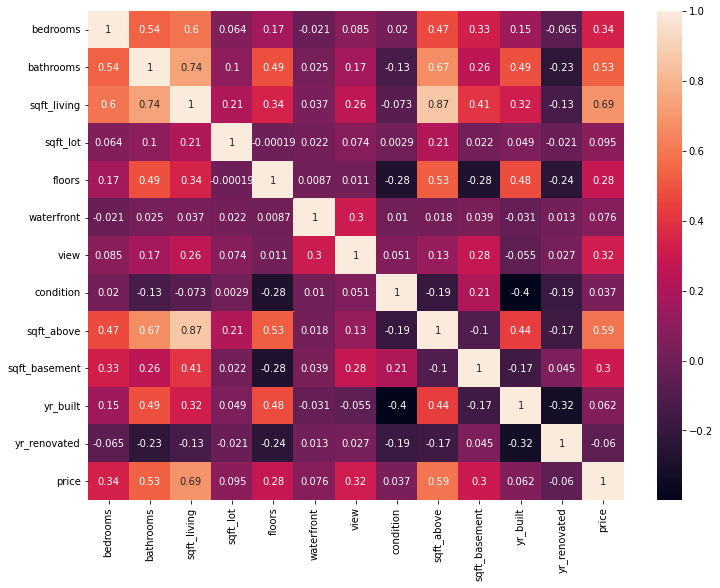

In [304]:
corr_df = df_n[list(X.columns)+['price']].corr(method='pearson')

plt.figure(figsize=(12, 9))
sns.heatmap(corr_df, annot=True)
plt.show()

La matriz anterior nos muestra que existen seis variables que tienen una correlación de nivel medio o superior (>=0.3) con el precio, por lo que nuestro modelo será reducido a las siguientes variables independientes:
* **sqft_living**, con correlación de 0.69
* **sqft_above**, con correlación de 0.59
* **bathrooms**, con correlación de 0.53
* **bedrooms**, con correlación de 0.34
* **view**, con correlación de 0.32
* **sqft_basement**, con correlación de 0.3

In [305]:
X_n = df_n[['sqft_living', 'sqft_above', 'bathrooms', 'bedrooms', 'view', 'sqft_basement']]
y_n = df_n['price']

**Aumentando la cantidad de datos de entrenamiento**

En esta ocasión, debido a que previamente tuvimos overfitting, aumentaremos la cantidad de datos de entrenamiento. Ahora la separación de subsets será de un 80% para entrenamiento, 10% para validación y 10% para pruebas.

In [306]:
# Separación de datos de entrenamiento (80%), validación (10%) y pruebas (10%).
X_n_train, X_n_rem, y_n_train, y_n_rem = train_test_split(X_n, y_n, random_state=439, train_size=0.8) #162
X_n_valid, X_n_test, y_n_valid, y_n_test = train_test_split(X_n_rem, y_n_rem, random_state=439, test_size=0.5)

**Ajuste en el hiperparámetro *learning rate***

Entrenaremos el nuevo modelo y después de algunas pruebas con el hiperparámetro de learning rate quedó ajustado a 0.00000000007.

In [307]:
lr_gd_n = SGDRegressor(eta0=0.00000000007, max_iter=5000, shuffle=False) # Modelo de Gradiente Descendiente donde eta0 es el learning rate.
lr_gd_n.fit(X_n_train, y_n_train) # Entrenamiento del modelo

SGDRegressor(eta0=7e-11, max_iter=5000, shuffle=False)

**Resultados del mejoramiento del modelo**

A continuación se observa una comparación del desempeño de los modelos antes y después de las mejoras que se aplicaron.

In [308]:
# Bias/sesgo del nuevo modelo
y_n_train_pred = lr_gd_n.predict(X_n_train)

print("Error del modelo (Error Cuadrático Medio):", metrics.mean_squared_error(y_n_train, y_n_train_pred))
print("Métrica de desempeño del modelo (Coeficiente de determinación R^2):", lr_gd_n.score(X_n_train, y_n_train))

Error del modelo (Error Cuadrático Medio): 41329372432.82939
Métrica de desempeño del modelo (Coeficiente de determinación R^2): 0.4486409954560556


Es posible notar que el sesgo del nuevo modelo es bastante similar al modelo anterior, un grado de bias/sesgo **medio**, lo cual es prometedor tratándose de un modelo de regresión lineal. En la siguiente gráfica se compara el bias, es decir, la lejanía entre los valores estimados y reales, de ambos modelos. Así mismo, se puede notar la limpieza de datos realizada.

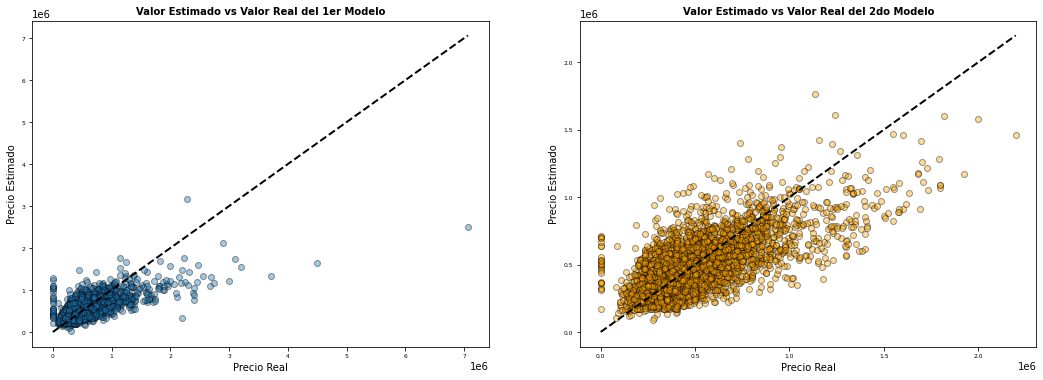

In [309]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

axes[0].scatter(y_train, y_train_pred, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0].plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], 'k--', color = 'black', lw=2)
axes[0].set_title('Valor Estimado vs Valor Real del 1er Modelo', fontsize = 10, fontweight = "bold")
axes[0].set_xlabel('Precio Real')
axes[0].set_ylabel('Precio Estimado')
axes[0].tick_params(labelsize = 6)

axes[1].scatter(y_n_train, y_n_train_pred, edgecolors=(0, 0, 0), alpha = 0.4, color='orange')
axes[1].plot([np.min(y_n_train), np.max(y_n_train)], [np.min(y_n_train), np.max(y_n_train)], 'k--', color = 'black', lw=2)
axes[1].set_title('Valor Estimado vs Valor Real del 2do Modelo', fontsize = 10, fontweight = "bold")
axes[1].set_xlabel('Precio Real')
axes[1].set_ylabel('Precio Estimado')
axes[1].tick_params(labelsize = 6)

In [310]:
# Varianza del nuevo modelo

y_n_valid_pred = lr_gd_n.predict(X_n_valid)
y_n_test_pred = lr_gd_n.predict(X_n_test)

# Comparación del error del modelo cuando se realizan predicciones sobre distintas muestras de datos.
print("Error del modelo para los datos de entrenamiento (Mean Squared Error):", metrics.mean_squared_error(y_n_train, y_n_train_pred))
print("Error del modelo para los datos de validación (Mean Squared Error):", metrics.mean_squared_error(y_n_valid, y_n_valid_pred))
print("Error del modelo para los datos de prueba (Mean Squared Error):", metrics.mean_squared_error(y_n_test, y_n_test_pred))
print()

# Comparación del coeficiente de determinación del modelo cuando se realizan predicciones sobre distintas muestras de datos.
print("Coeficiente de determinación R^2 para los datos de entrenamiento:", lr_gd_n.score(X_n_train, y_n_train))
print("Coeficiente de determinación R^2 para los datos de validación:", lr_gd_n.score(X_n_valid, y_n_valid))
print("Coeficiente de determinación R^2 para los datos de prueba:", lr_gd_n.score(X_n_test, y_n_test))

Error del modelo para los datos de entrenamiento (Mean Squared Error): 41329372432.82939
Error del modelo para los datos de validación (Mean Squared Error): 34417688592.69379
Error del modelo para los datos de prueba (Mean Squared Error): 39069817486.03314

Coeficiente de determinación R^2 para los datos de entrenamiento: 0.4486409954560556
Coeficiente de determinación R^2 para los datos de validación: 0.5429638905176706
Coeficiente de determinación R^2 para los datos de prueba: 0.5520584746570198


Con el código anterior se puede notar que el desempeño del modelo fue muy similar para los tres distintos subsets de datos, lo que indica que, a diferencia del primer modelo, este nuevo modelo tiene un grado de varianza **bajo**, lo cual es una clara mejora. En las siguientes gráficas se puede apreciar de mejor manera esta diferencia de varianza entre ambos modelos, donde la diferencia de desempeño para los diferentes subsets es muy corta para el segundo modelo.

Text(0.5, 1.0, 'Coeficiente R^2 del 2do Modelo sobre Distintas Muestras')

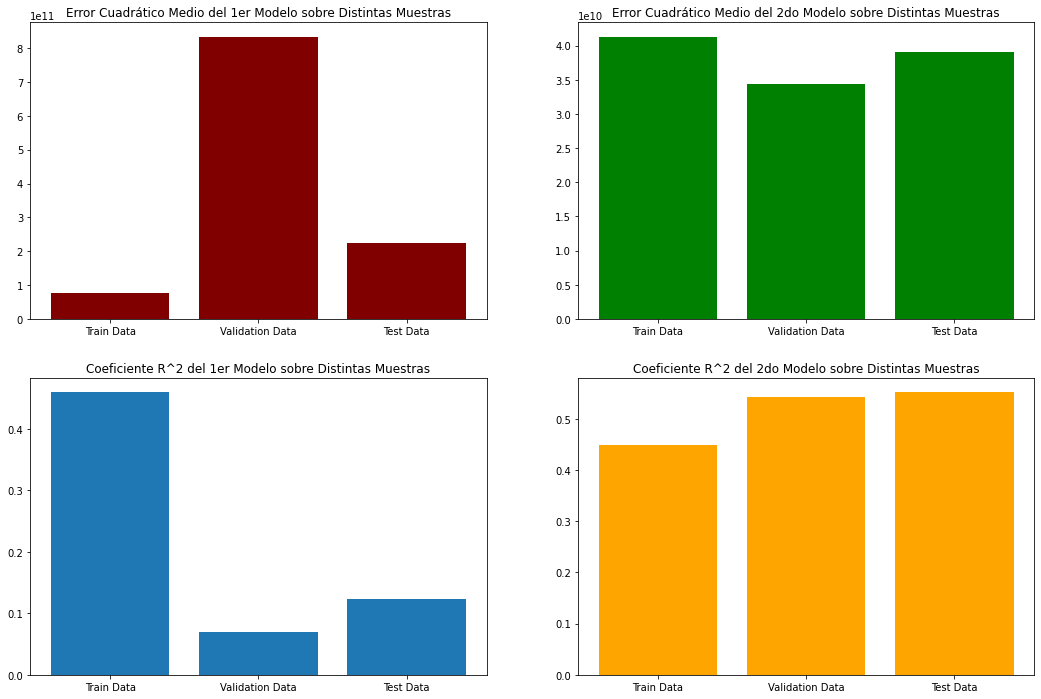

In [311]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

axes[0][0].bar(['Train Data', 'Validation Data', 'Test Data'], [metrics.mean_squared_error(y_train, y_train_pred), metrics.mean_squared_error(y_valid, y_valid_pred), metrics.mean_squared_error(y_test, y_test_pred)], color ='maroon')
axes[0][0].set_title('Error Cuadrático Medio del 1er Modelo sobre Distintas Muestras')

axes[0][1].bar(['Train Data', 'Validation Data', 'Test Data'], [metrics.mean_squared_error(y_n_train, y_n_train_pred), metrics.mean_squared_error(y_n_valid, y_n_valid_pred), metrics.mean_squared_error(y_n_test, y_n_test_pred)], color ='green')
axes[0][1].set_title('Error Cuadrático Medio del 2do Modelo sobre Distintas Muestras')

axes[1][0].bar(['Train Data', 'Validation Data', 'Test Data'], [lr_gd.score(X_train, y_train), lr_gd.score(X_valid, y_valid), lr_gd.score(X_test, y_test)])
axes[1][0].set_title('Coeficiente R^2 del 1er Modelo sobre Distintas Muestras')

axes[1][1].bar(['Train Data', 'Validation Data', 'Test Data'], [lr_gd_n.score(X_n_train, y_n_train), lr_gd_n.score(X_n_valid, y_n_valid), lr_gd_n.score(X_n_test, y_n_test)], color ='orange')
axes[1][1].set_title('Coeficiente R^2 del 2do Modelo sobre Distintas Muestras')